### Analysis: 2015 Alcohol Consumption and Annual Temperature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/modified/left_merge_table.csv')
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 256
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             249 non-null    int64  
 1   ethanol_beer_gallons_per_capita        249 non-null    float64
 2   ethanol_wine_gallons_per_capita        249 non-null    float64
 3   ethanol_spirit_gallons_per_capita      249 non-null    float64
 4   ethanol_all_drinks_gallons_per_capita  249 non-null    float64
 5   number_of_beers                        249 non-null    float64
 6   number_of_glasses_wine                 249 non-null    float64
 7   number_of_shots_liquor                 249 non-null    float64
 8   number_of_drinks_total                 249 non-null    float64
 9   STATE                                  249 non-null    object 
 10  ANN                                    249 non-null    float64
dtypes: flo

### Statisical Comparison and Graphing

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 256
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             249 non-null    int64  
 1   ethanol_beer_gallons_per_capita        249 non-null    float64
 2   ethanol_wine_gallons_per_capita        249 non-null    float64
 3   ethanol_spirit_gallons_per_capita      249 non-null    float64
 4   ethanol_all_drinks_gallons_per_capita  249 non-null    float64
 5   number_of_beers                        249 non-null    float64
 6   number_of_glasses_wine                 249 non-null    float64
 7   number_of_shots_liquor                 249 non-null    float64
 8   number_of_drinks_total                 249 non-null    float64
 9   STATE                                  249 non-null    object 
 10  ANN                                    249 non-null    float64
dtypes: flo

,Unnamed: 0,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,126.626506,1.165542,0.411888,0.872008,2.449799,276.277269,81.738996,181.049920,522.624538,104.493976
std,74.354216,0.183961,0.163764,0.234254,0.426966,43.605633,32.498892,48.636768,91.086137,7.703225
min,0.000000,0.650000,0.110000,0.470000,1.400000,154.070000,21.830000,97.580000,298.670000,66.000000
25%,63.000000,1.010000,0.300000,0.700000,2.190000,239.410000,59.530000,145.340000,467.200000,102.000000
50%,126.000000,1.120000,0.400000,0.780000,2.280000,265.480000,79.380000,161.950000,486.400000,105.000000
75%,190.000000,1.280000,0.530000,0.980000,2.730000,303.410000,105.180000,203.470000,582.400000,109.000000
max,256.000000,1.870000,1.140000,1.950000,4.700000,443.260000,226.230000,404.870000,1002.670000,122.000000


### MannWhitneyU Test

In [5]:
u_beers = stats.mannwhitneyu(df['ANN'], df['number_of_beers'])
u_wine = stats.mannwhitneyu(df['ANN'], df['number_of_glasses_wine'])
u_shots = stats.mannwhitneyu(df['ANN'], df['number_of_shots_liquor'])
u_total = stats.mannwhitneyu(df['ANN'], df['number_of_drinks_total'])

u_results = (f'MannWhitneyU Results: Number of Beers: {u_beers};   Number of Glasses Wine:{u_wine};    Number of Shots{u_shots};    Total Drinks: {u_total};')
u_results

'MannWhitneyU Results: Number of Beers: MannwhitneyuResult(statistic=0.0, pvalue=1.955263257631872e-83);   Number of Glasses Wine:MannwhitneyuResult(statistic=14136.0, pvalue=3.939313034921851e-26);    Number of ShotsMannwhitneyuResult(statistic=929.0, pvalue=1.2869623103039633e-78);    Total Drinks: MannwhitneyuResult(statistic=0.0, pvalue=2.0344285545615244e-83);'

### Pearsonr

In [6]:
p_beers = stats.pearsonr(df['ANN'], df['number_of_beers'])
p_wine = stats.pearsonr(df['ANN'], df['number_of_glasses_wine'])
p_shots = stats.pearsonr(df['ANN'], df['number_of_shots_liquor'])
p_total = stats.pearsonr(df['ANN'], df['number_of_drinks_total'])

p_results = (f'Pearsonr Results: Number of Beers: {p_beers};   Number of Glasses Wine:{p_wine};    Number of Shots{p_shots};    Total Drinks: {p_total};')
p_results

'Pearsonr Results: Number of Beers: (0.03879235442721353, 0.5423373090312318);   Number of Glasses Wine:(-0.28972604526774554, 3.337259516630482e-06);    Number of Shots(-0.4066398894076336, 2.4714372269605796e-11);    Total Drinks: (-0.3182628401611133, 2.884092681348871e-07);'

### Spearmanr

In [7]:
s_beers_gal = stats.spearmanr(df['ANN'], df['ethanol_beer_gallons_per_capita'])
s_wine_gal = stats.spearmanr(df['ANN'], df['ethanol_wine_gallons_per_capita'])
s_shots_gal = stats.spearmanr(df['ANN'], df['ethanol_spirit_gallons_per_capita'])
s_total_gal = stats.spearmanr(df['ANN'], df['ethanol_all_drinks_gallons_per_capita']) 

p_results = (f'Spearmanr Results: Number of Beers: {s_beers_gal};   Number of Glasses Wine:{s_wine_gal};    Number of Shots{s_shots_gal};    Total Drinks: {s_total_gal};')
p_results

'Spearmanr Results: Number of Beers: SpearmanrResult(correlation=0.11799328357017054, pvalue=0.06302242402319819);   Number of Glasses Wine:SpearmanrResult(correlation=-0.339638537681751, pvalue=3.869617173537449e-08);    Number of ShotsSpearmanrResult(correlation=-0.3008408600008164, pvalue=1.32615598730314e-06);    Total Drinks: SpearmanrResult(correlation=-0.22470174841968737, pvalue=0.0003519710919161753);'

### Categorical Plotting Stat Tests

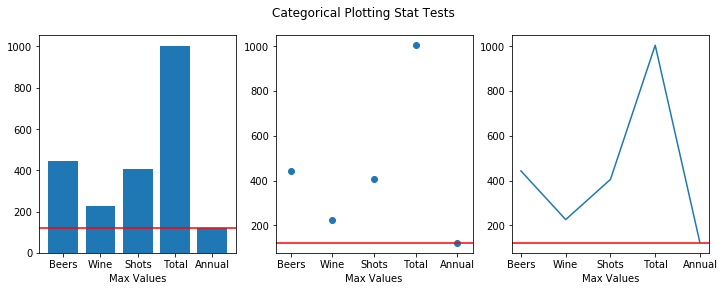

In [18]:
names = ['Beers', 'Wine', 'Shots', 'Total', 'Annual']
max_values = [443, 226, 405, 1003, 122]

plt.figure(figsize=(12,4))
# plt.hlines(122, 0, 5)
plt.subplot(131)
plt.xlabel("Max Values")
plt.hlines(122,-2,6,colors = 'red')
plt.bar(names, max_values)
plt.subplot(132)
plt.xlabel("Max Values")
plt.hlines(122,-2,6,colors = 'red')
plt.scatter(names, max_values)
plt.subplot(133)
plt.hlines(122,-2,6, colors = 'red')
plt.plot(names, max_values)
plt.suptitle("Categorical Plotting Stat Tests")
plt.xlabel("Max Values")
# plt.subtitle("Categorical Plotting of Stat Tests")
plt.show()

### Scatter Plots

No handles with labels found to put in legend.


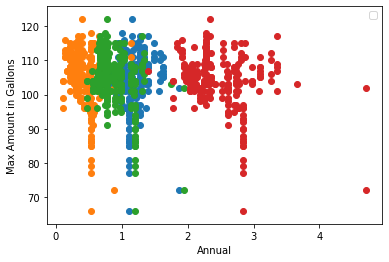

In [168]:
plt.scatter(df['ethanol_beer_gallons_per_capita'], df['ANN'])
plt.scatter(df['ethanol_wine_gallons_per_capita'], df['ANN'])
plt.scatter(df['ethanol_spirit_gallons_per_capita'], df['ANN'])
plt.scatter(df['ethanol_all_drinks_gallons_per_capita'], df['ANN'])
plt.xlabel('Annual')
plt.ylabel('Max Amount in Gallons')

plt.legend()
plt.savefig('../img/annual_gallons.jpg', dpi = 300)
plt.show();

In [167]:
df.sort_values('number_of_glasses_wine', ascending=False)

,Unnamed: 0,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,STATE,ANN
74,74,0.94,1.14,0.79,2.87,222.81,226.23,164.02,612.27,ID,111.0
75,75,0.94,1.14,0.79,2.87,222.81,226.23,164.02,612.27,ID,115.0
76,76,0.94,1.14,0.79,2.87,222.81,226.23,164.02,612.27,ID,104.0
150,150,1.87,0.88,1.95,4.70,443.26,174.64,404.87,1002.67,NH,72.0
149,149,1.87,0.88,1.95,4.70,443.26,174.64,404.87,1002.67,NH,102.0
...,...,...,...,...,...,...,...,...,...,...,...
94,94,1.03,0.14,0.74,1.91,244.15,27.78,153.64,407.47,KS,113.0
245,245,1.21,0.11,0.47,1.78,286.81,21.83,97.58,379.73,WV,96.0
246,246,1.21,0.11,0.47,1.78,286.81,21.83,97.58,379.73,WV,104.0
247,247,1.21,0.11,0.47,1.78,286.81,21.83,97.58,379.73,WV,99.0


In [ ]:
data = {'Beers': 10, 'Shots': 15, 'Wine': 5, 'Total': 20, 'Annual': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')